In [29]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

RANDOM_SEED = 42

# Specify each path

In [30]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [31]:
NUM_CLASSES = 26

# Dataset reading

In [32]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [33]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [34]:
# Normalize the dataset
X_dataset = X_dataset / np.max(X_dataset)

In [35]:
class_weights = compute_class_weight('balanced',classes = np.unique(y_dataset), y = y_dataset)
class_weights = dict(enumerate(class_weights))                 

# K-Fold Cross Validation

In [36]:
k = 5  # Number of folds
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=RANDOM_SEED)

In [37]:
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input((21 * 2,)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Early stopping callback
es_callback = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True, verbose=1)
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=10,min_lr=1e-6, verbose=1)

In [38]:
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

Fold 1/5
Epoch 1/1000
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.6709 - loss: 1.1844 - val_accuracy: 0.9354 - val_loss: 0.2475 - learning_rate: 0.0010
Epoch 2/1000
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8950 - loss: 0.3912 - val_accuracy: 0.9442 - val_loss: 0.1989 - learning_rate: 0.0010
Epoch 3/1000
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9135 - loss: 0.3305 - val_accuracy: 0.9503 - val_loss: 0.1772 - learning_rate: 0.0010
Epoch 4/1000
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9185 - loss: 0.3040 - val_accuracy: 0.9521 - val_loss: 0.1688 - learning_rate: 0.0010
Epoch 5/1000
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9239 - loss: 0.2874 - val_accuracy: 0.9544 - val_loss: 0.1603 - learning_rate: 0.0010
Epoch 6/1000
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9259 - loss: 0.2762 - val_accuracy: 0.9561 - val_loss: 0.1538 - learning_rate: 0.0010
Epoch 7/1000
2166/2166 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/s

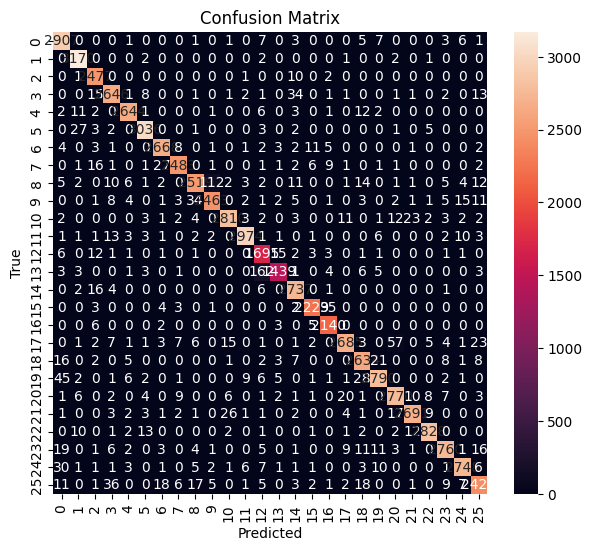

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2942
           1       0.98      1.00      0.99      3178
           2       0.97      0.99      0.98      2491
           3       0.96      0.97      0.97      2728
           4       0.99      0.98      0.99      2685
           5       0.99      0.99      0.99      3080
           6       0.98      0.98      0.98      2712
           7       0.98      0.97      0.98      2554
           8       0.97      0.93      0.95      2713
           9       0.95      0.96      0.96      2563
          10       0.98      0.97      0.98      2886
          11       0.99      0.98      0.99      3025
          12       0.88      0.97      0.93      1744
          13       0.98      0.88      0.93      1631
          14       0.97      0.99      0.98      2767
          15       0.98      0.98      0.98      2277
          16       0.97      0.99      0.98      2156
     

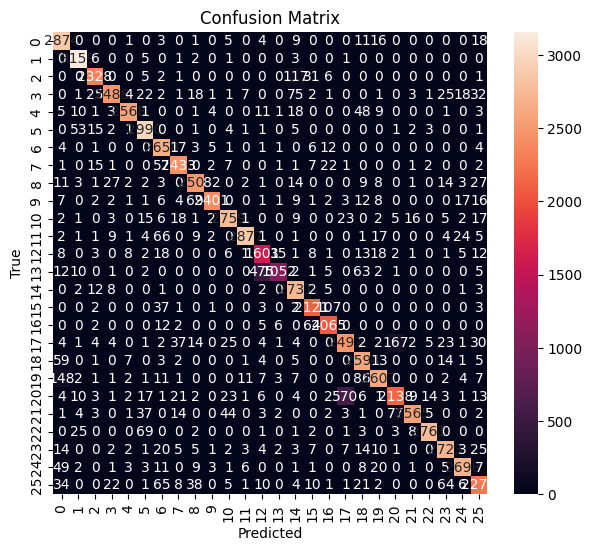

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2942
           1       0.96      0.99      0.98      3178
           2       0.96      0.93      0.95      2491
           3       0.97      0.91      0.94      2728
           4       0.99      0.96      0.97      2684
           5       0.94      0.97      0.96      3080
           6       0.89      0.98      0.93      2713
           7       0.95      0.95      0.95      2553
           8       0.93      0.92      0.93      2713
           9       0.96      0.94      0.95      2563
          10       0.96      0.96      0.96      2887
          11       0.99      0.95      0.97      3025
          12       0.75      0.92      0.82      1744
          13       0.95      0.65      0.77      1631
          14       0.90      0.99      0.94      2767
          15       0.94      0.93      0.93      2277
          16       0.93      0.96      0.94      2156
     

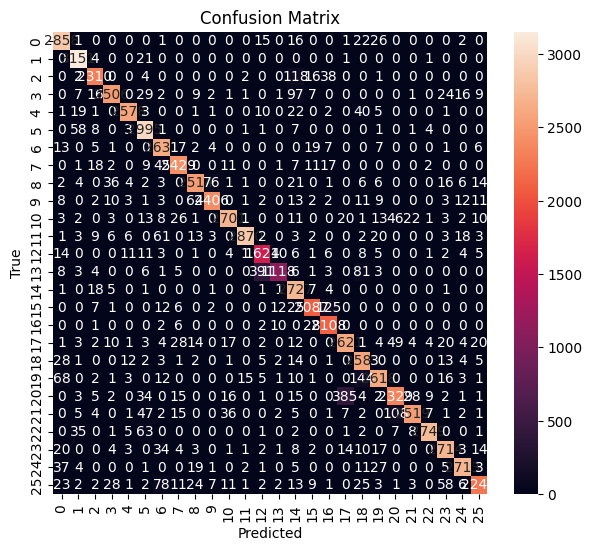

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2942
           1       0.95      0.99      0.97      3178
           2       0.96      0.93      0.94      2491
           3       0.96      0.92      0.94      2728
           4       0.98      0.96      0.97      2684
           5       0.92      0.97      0.95      3080
           6       0.91      0.97      0.94      2713
           7       0.95      0.95      0.95      2553
           8       0.94      0.93      0.93      2713
           9       0.96      0.94      0.95      2563
          10       0.96      0.94      0.95      2887
          11       0.99      0.95      0.97      3025
          12       0.79      0.93      0.85      1744
          13       0.94      0.69      0.79      1630
          14       0.86      0.99      0.92      2767
          15       0.95      0.92      0.93      2277
          16       0.91      0.98      0.94      2157
     

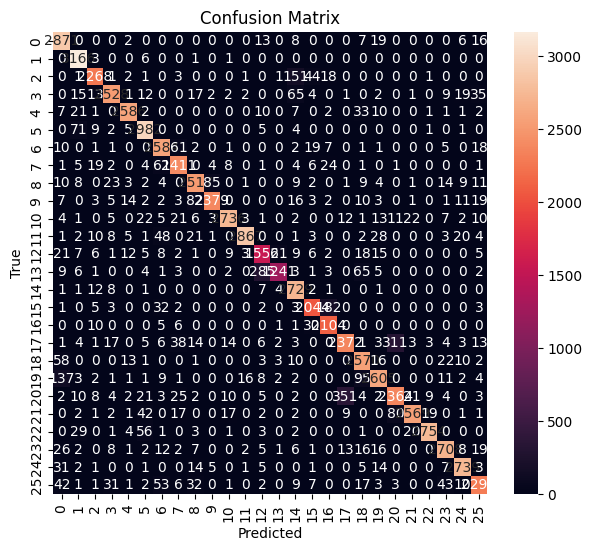

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2942
           1       0.94      1.00      0.97      3177
           2       0.95      0.91      0.93      2492
           3       0.95      0.93      0.94      2728
           4       0.97      0.96      0.97      2684
           5       0.94      0.97      0.95      3080
           6       0.91      0.95      0.93      2713
           7       0.93      0.94      0.94      2553
           8       0.93      0.93      0.93      2713
           9       0.96      0.93      0.94      2563
          10       0.98      0.95      0.96      2887
          11       0.99      0.95      0.97      3025
          12       0.81      0.89      0.85      1743
          13       0.94      0.76      0.84      1631
          14       0.89      0.99      0.94      2767
          15       0.94      0.90      0.92      2277
          16       0.90      0.98      0.93      2157
     

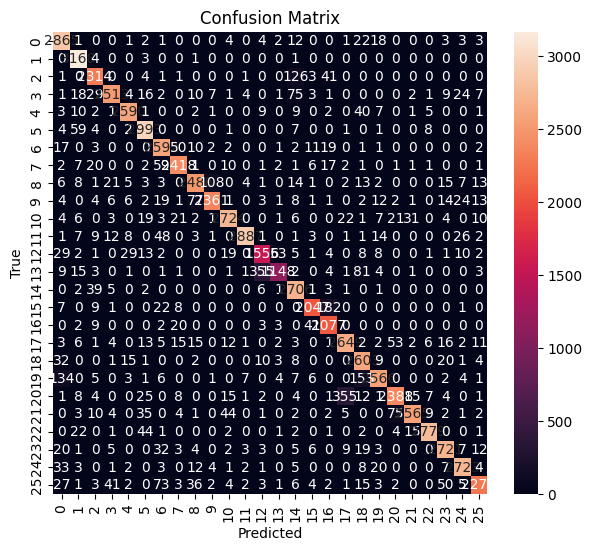

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      2942
           1       0.95      1.00      0.97      3177
           2       0.94      0.93      0.93      2492
           3       0.96      0.92      0.94      2728
           4       0.97      0.96      0.97      2684
           5       0.94      0.97      0.96      3080
           6       0.90      0.96      0.93      2713
           7       0.95      0.95      0.95      2553
           8       0.93      0.92      0.93      2713
           9       0.95      0.92      0.93      2563
          10       0.96      0.94      0.95      2886
          11       0.99      0.95      0.97      3025
          12       0.79      0.89      0.84      1744
          13       0.94      0.70      0.80      1631
          14       0.90      0.98      0.94      2767
          15       0.96      0.90      0.93      2277
          16       0.88      0.96      0.92      2157
     

In [39]:
val_losses = []
val_accuracies = []

for fold, (train_index, val_index) in enumerate(kf.split(X_dataset, y_dataset)):
    print(f"Fold {fold + 1}/{k}")
    
    X_train, X_val = X_dataset[train_index], X_dataset[val_index]
    y_train, y_val = y_dataset[train_index], y_dataset[val_index]

    model = build_model()

    # Train the model
    model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_val, y_val), callbacks=[es_callback,lr_callback], class_weight=class_weights, verbose=1)

    # Evaluate the model
    val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_acc}")

    # Predict and print confusion matrix and classification report for each fold
    y_pred = np.argmax(model.predict(X_val), axis=1)
    print_confusion_matrix(y_val, y_pred, report=True)

# Print average performance
print(f"\nAverage Validation Loss: {np.mean(val_losses)}")
print(f"Average Validation Accuracy: {np.mean(val_accuracies)}")

# Model building

In [40]:
# Final model training on the entire dataset
final_model = build_model()

In [41]:
final_model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_24          │ (None, 42)             │           168 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 26)             │           858 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,762 (69.38 KB)

 Trainable params: 17,230 (67.30 KB)

 Non-trainable params: 532 (2.08 KB)

In [42]:

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

# Model training

In [44]:
final_model.fit(
    X_dataset,
    y_dataset,
    epochs=1000,
    batch_size=128,
    callbacks=[es_callback,lr_callback],
    class_weight = class_weights,
    verbose = 1
)

Epoch 1/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6958 - loss: 1.0950 - learning_rate: 0.0010
Epoch 2/1000
  69/2708 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8970 - loss: 0.3900 

C:\Users\trist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
C:\Users\trist\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


2708/2708 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9058 - loss: 0.3589 - learning_rate: 0.0010
Epoch 3/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9180 - loss: 0.3115 - learning_rate: 0.0010
Epoch 4/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9231 - loss: 0.2917 - learning_rate: 0.0010
Epoch 5/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9261 - loss: 0.2780 - learning_rate: 0.0010
Epoch 6/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9290 - loss: 0.2680 - learning_rate: 0.0010
Epoch 7/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9305 - loss: 0.2611 - learning_rate: 0.0010
Epoch 8/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9322 - loss: 0.2558 - learning_rate: 0.0010
Epoch 9/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9334 - loss: 0.2509 - learning_rate: 0.0010
Epoch 10/1000
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9342 - loss: 0.2469 - learning

In [ ]:
# Loading the saved model for inference
loaded_model = tf.keras.models.load_model(model_save_path)

# Inference test
predict_result = loaded_model.predict(np.array([X_dataset[0]]))
print("Prediction Result:", np.squeeze(predict_result))
print("Predicted Class:", np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Prediction Result: [9.9999857e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1020967e-26
 0.0000000e+00 6.0441764e-12 1.0646685e-21 1.8903407e-12 4.3144283e-10
 1.9981755e-19 9.5832234e-19 1.5286421e-15 1.4739103e-15 2.8475276e-36
 1.7392522e-07 1.1378410e-06 2.1129054e-24 1.6878006e-27 2.3460327e-13
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6921482e-32 1.0510405e-07
 1.9048342e-33]
Predicted Class: 0


# Convert to model for Tensorflow-Lite

In [ ]:
# Save as a model dedicated to inference
final_model.save(model_save_path, include_optimizer=False)

In [ ]:
# Transform model (quantization) to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the TFLite model
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\newyo\AppData\Local\Temp\tmpjo1xsexl\assets


INFO:tensorflow:Assets written to: C:\Users\newyo\AppData\Local\Temp\tmpjo1xsexl\assets


Saved artifact at 'C:\Users\newyo\AppData\Local\Temp\tmpjo1xsexl'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_24')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  1892621805776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892677694240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892621798384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892621807184: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892677108480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892471699616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892851945136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892851942320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892851943024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1892851949360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  18928516445

# Inference test

In [ ]:
# TFLite inference test
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
# Get I/O tensors
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
# Set input tensor
interpreter.set_tensor(input_details[0]['index'], np.array([X_dataset[0]]))

In [ ]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [ ]:
print("TFLite Prediction Result:", np.squeeze(tflite_results))
print("TFLite Predicted Class:", np.argmax(np.squeeze(tflite_results)))

TFLite Prediction Result: [9.9999905e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6623888e-27
 0.0000000e+00 1.5037520e-12 1.4577738e-22 8.7152258e-13 2.0862663e-10
 3.6749544e-20 1.4048472e-19 3.6653572e-16 1.8875127e-16 2.8074793e-37
 9.8848275e-08 7.1429361e-07 3.2703469e-25 1.8044086e-28 6.9390294e-14
 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.1474947e-34 6.7492159e-08
 4.7123126e-35]
TFLite Predicted Class: 0
